# Лабораторная работа 2.2.2: Математическая модель пружины

## Формулировка задачи

Исследование колебаний пружинного маятника с учетом демпфирования (затухания).

## Система уравнений

**Без демпфирования:**
$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{k}{m}x
\end{cases}$$

**С линейным демпфированием:**
$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{k}{m}x - \frac{\alpha}{m}v
\end{cases}$$

## Аналитические решения

**Без демпфирования:**
$$\begin{cases}
x(t) = A\cos(\omega_0 t + \phi) \\
v(t) = -A\omega_0\sin(\omega_0 t + \phi)
\end{cases}$$

где $\omega_0 = \sqrt{k/m}$ - собственная частота.

**С демпфированием:**
$$\begin{cases}
x(t) = e^{-\gamma t}(A\cos(\omega_d t) + B\sin(\omega_d t)) \\
v(t) = e^{-\gamma t}(-A\omega_d\sin(\omega_d t) + B\omega_d\cos(\omega_d t)) - \gamma x(t)
\end{cases}$$

где $\gamma = \alpha/(2m)$ - коэффициент затухания, $\omega_d = \sqrt{\omega_0^2 - \gamma^2}$ - частота затухающих колебаний.

## Параметры

- Масса: $m = 1.0$ кг
- Жесткость пружины: $k = 10.0$ Н/м
- Коэффициент демпфирования: $\alpha = 0.5$
- Начальное смещение: $x_0 = 1.0$ м
- Начальная скорость: $v_0 = 0.0$ м/с


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

# Параметры системы
m = 1.0        
k = 10.0       
alpha = 0.5  
beta = 0.1     

# Начальные условия
x0 = 1.0      
v0 = 0.0      

# Производные параметры
omega0 = np.sqrt(k/m)
gamma = alpha/(2*m)
omega_d = np.sqrt(omega0**2 - gamma**2) if gamma < omega0 else 0

# Временной интервал
t_max = 20.0
t_span = (0, t_max)
t_eval = np.linspace(0, t_max, 1000)


In [2]:
# Без сопротивления
def system_no_damping(t, state):
    x, v = state
    dxdt = v
    dvdt = -(k/m) * x
    return [dxdt, dvdt]

solution_no_damping = solve_ivp(
    system_no_damping,
    t_span,
    [x0, v0],
    method='RK45',
    dense_output=True,
    rtol=1e-10
)

x_num_no_damping = solution_no_damping.sol(t_eval)[0]
v_num_no_damping = solution_no_damping.sol(t_eval)[1]


$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{k}{m}x
\end{cases}$$


In [3]:
# С линейным сопротивлением
def system_linear_damping(t, state):
    x, v = state
    dxdt = v
    dvdt = -(k/m) * x - (alpha/m) * v
    return [dxdt, dvdt]

solution_linear = solve_ivp(
    system_linear_damping,
    t_span,
    [x0, v0],
    method='RK45',
    dense_output=True,
    rtol=1e-10
)

x_num_linear = solution_linear.sol(t_eval)[0]
v_num_linear = solution_linear.sol(t_eval)[1]


$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{k}{m}x - \frac{\alpha}{m}v
\end{cases}$$


In [4]:
# Аналитические решения
# Без затухания
A = x0  
phi = 0 

x_analytical_no_damping = A * np.cos(omega0 * t_eval + phi)
v_analytical_no_damping = -A * omega0 * np.sin(omega0 * t_eval + phi)

# С линейным затуханием
x_analytical_linear = np.exp(-gamma * t_eval) * (
    x0 * np.cos(omega_d * t_eval) + 
    ((v0 + gamma * x0) / omega_d) * np.sin(omega_d * t_eval)
)
v_analytical_linear = np.exp(-gamma * t_eval) * (
    -(x0 * omega_d + (v0 + gamma * x0) * gamma / omega_d) * np.sin(omega_d * t_eval) +
    (v0 + gamma * x0 - gamma * x0) * np.cos(omega_d * t_eval)
) - gamma * x_analytical_linear


$$\begin{cases}
x(t) = A\cos(\omega_0 t + \phi) \\
v(t) = -A\omega_0\sin(\omega_0 t + \phi)
\end{cases}$$

$$\begin{cases}
x(t) = e^{-\gamma t}(A\cos(\omega_d t) + B\sin(\omega_d t)) \\
v(t) = e^{-\gamma t}(-A\omega_d\sin(\omega_d t) + B\omega_d\cos(\omega_d t)) - \gamma x(t)
\end{cases}$$


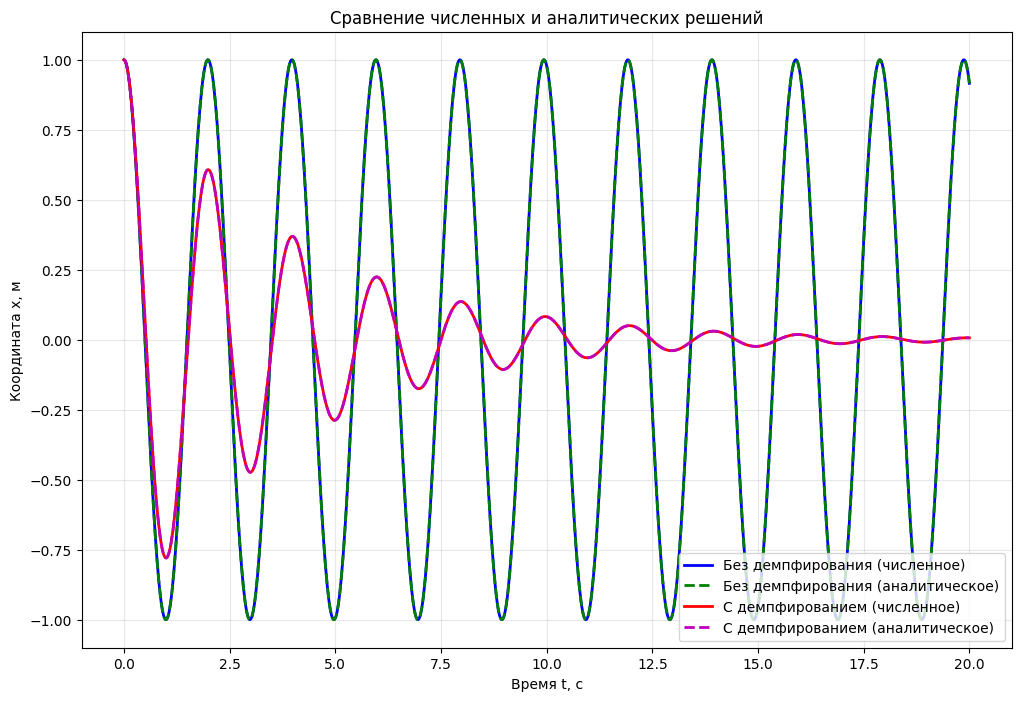

,Числ. без демпф.,Анал. без демпф.,Err без демпф.,Числ. с демпф.,Анал. с демпф.,Err с демпф.
"Время t, c",,,,,,
0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1.981982,0.999877,0.999878,0.000001,0.607189,0.607189,0.000001
3.983984,0.999483,0.999485,0.000002,0.369129,0.369130,0.000001
5.985986,0.996815,0.996818,0.000003,0.224229,0.224231,0.000002
7.987988,0.991880,0.991884,0.000004,0.136103,0.136104,0.000002
9.989990,0.984688,0.984692,0.000005,0.082547,0.082549,0.000002
11.991992,0.975256,0.975261,0.000006,0.050026,0.050028,0.000002
13.993994,0.963605,0.963611,0.000007,0.030293,0.030295,0.000002
15.995996,0.949762,0.949769,0.000008,0.018330,0.018331,0.000002


In [5]:
plt.figure(figsize=(12, 8))
plt.plot(t_eval, x_num_no_damping, 'b-', linewidth=2, label='Без демпфирования (численное)')
plt.plot(t_eval, x_analytical_no_damping, 'g--', linewidth=2, label='Без демпфирования (аналитическое)')
plt.plot(t_eval, x_num_linear, 'r-', linewidth=2, label='С демпфированием (численное)')
plt.plot(t_eval, x_analytical_linear, 'm--', linewidth=2, label='С демпфированием (аналитическое)')
plt.xlabel('Время t, с')
plt.ylabel('Координата x, м')
plt.title('Сравнение численных и аналитических решений')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

num_points_in_table = 11
indices = np.linspace(0, len(t_eval) - 1, num_points_in_table, dtype=int)

# Выборка данных по индексам
t_sample = t_eval[indices]
x_num_nd_sample = x_num_no_damping[indices]
x_anal_nd_sample = x_analytical_no_damping[indices]
x_num_d_sample = x_num_linear[indices]
x_anal_d_sample = x_analytical_linear[indices]

# DataFrame
comparison_df = pd.DataFrame({
    'Время t, c': t_sample,
    'Числ. без демпф.': x_num_nd_sample,
    'Анал. без демпф.': x_anal_nd_sample,
    'Err без демпф.': np.abs(x_num_nd_sample - x_anal_nd_sample),
    'Числ. с демпф.': x_num_d_sample,
    'Анал. с демпф.': x_anal_d_sample,
    'Err с демпф.': np.abs(x_num_d_sample - x_anal_d_sample)
})

# Установка времени как индекса для наглядности
comparison_df = comparison_df.set_index('Время t, c')

display(comparison_df.round(6))
